# Importando pacotes

In [3]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Adquirindo e limpando dados

In [4]:
end = dt.datetime.now() # end = dt.date(2020,10,31), para arrumar o problema do tamanho da base de dados
start = dt.date(end.year - 5, end.month,end.day)
Input = ['MSFT','^GSPC'] # nome da ação, nome do indice do mercado correspondente

In [5]:
df = reader.get_data_yahoo(Input,start,end)['Adj Close']

In [6]:
df

Symbols,MSFT,^GSPC
Date,,
2016-01-07,47.606789,1943.089966
2016-01-08,47.752792,1922.030029
2016-01-11,47.725410,1923.670044
2016-01-12,48.163425,1938.680054
2016-01-13,47.123150,1890.280029
...,...,...
2020-12-30,221.679993,3732.040039
2020-12-31,222.419998,3756.070068
2021-01-04,217.690002,3700.649902


In [7]:
mtl_ret = df.resample('M').ffill().pct_change() # altera os dados de diário para mensal mudando pra primeira diff
mtl_ret = mtl_ret.dropna(axis=0) # retira o primeiro dado nulo
mtl_ret.tail()

Symbols,MSFT,^GSPC
Date,,
2020-09-30,-0.067397,-0.039228
2020-10-31,-0.037370,-0.027666
2020-11-30,0.060060,0.107546
2020-12-31,0.039006,0.037121
2021-01-31,-0.045724,-0.002111


In [8]:
len(mtl_ret)

60

# Definindo o Beta

In [9]:
X = mtl_ret['^GSPC'] # Ibovespa
y = mtl_ret['MSFT'] # Ação objetivo

X_sm = sm.add_constant(X) # adciona o alfa (beta zero)

In [10]:
model = sm.OLS(y, X_sm)

In [11]:
results = model.fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     51.34
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           1.55e-09
Time:                        13:00:30   Log-Likelihood:                 110.14
No. Observations:                  60   AIC:                            -216.3
Df Residuals:                      58   BIC:                            -212.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0156      0.005      2.957      0.004       0.005       0.026
^GSPC          0.8460      0.118      7.165      0.000       0.610       1.082
==============================================================================
Omnibus:                        1.551   Durbin-Watson:                   2.467
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                0.876
Skew:                          -0.246   Prob(JB):                        0.645
Kurtosis:                       3.329   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualizando

In [13]:
import seaborn as sns

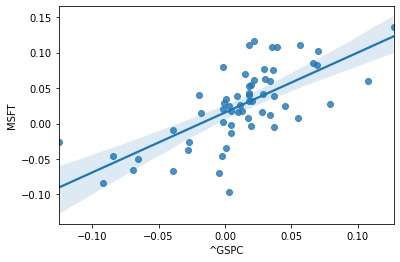

In [14]:
sns.regplot(x='^GSPC', y='MSFT', data=mtl_ret) # o f(x=0) é o alfa
plt.show() # f(x=0,1) = 0,083

# Adcionando a taxa livre de risco (rf)

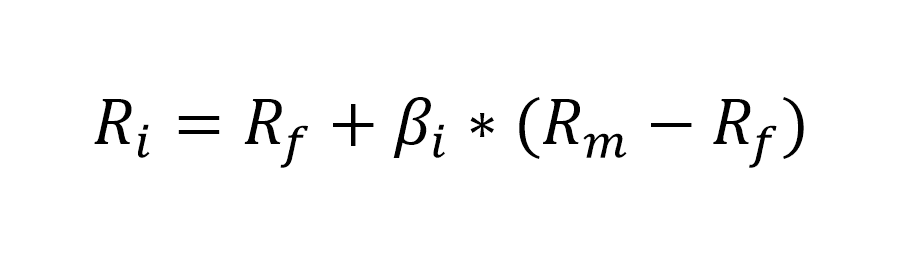

In [15]:
url = 'http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Benchmarks'
# site com todas as taxas livres de risco

In [16]:
rf = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)[0].RF

In [17]:
rf = rf[1:] # neste caso, importei a dos EUA mas tem a brasileira também
rf # os dados dessa base vão até somente outubro

Date
2016-02    0.02
2016-03    0.02
2016-04    0.01
2016-05    0.01
2016-06    0.02
2016-07    0.02
2016-08    0.02
2016-09    0.02
2016-10    0.02
2016-11    0.01
2016-12    0.03
2017-01    0.04
2017-02    0.04
2017-03    0.03
2017-04    0.05
2017-05    0.06
2017-06    0.06
2017-07    0.07
2017-08    0.09
2017-09    0.09
2017-10    0.09
2017-11    0.08
2017-12    0.09
2018-01    0.11
2018-02    0.11
2018-03    0.12
2018-04    0.14
2018-05    0.14
2018-06    0.14
2018-07    0.16
2018-08    0.16
2018-09    0.15
2018-10    0.19
2018-11    0.18
2018-12    0.19
2019-01    0.21
2019-02    0.18
2019-03    0.19
2019-04    0.21
2019-05    0.21
2019-06    0.18
2019-07    0.19
2019-08    0.16
2019-09    0.18
2019-10    0.15
2019-11    0.12
2019-12    0.14
2020-01    0.13
2020-02    0.12
2020-03    0.12
2020-04    0.00
2020-05    0.01
2020-06    0.01
2020-07    0.01
2020-08    0.01
2020-09    0.01
2020-10    0.01
Freq: M, Name: RF, dtype: float64

In [18]:
# As bases possuem tamanhos diferentes
print(len(mtl_ret))
print(len(rf))

60
57


In [19]:
mtl_ret.tail() # parece que rf vai até outubro e mtl_ret vai até dezembro de 2020

Symbols,MSFT,^GSPC
Date,,
2020-09-30,-0.067397,-0.039228
2020-10-31,-0.037370,-0.027666
2020-11-30,0.060060,0.107546
2020-12-31,0.039006,0.037121
2021-01-31,-0.045724,-0.002111


In [20]:
mtl_ret['MSFT-rf'], mtl_ret['^GSPC-rf'] = mtl_ret['MSFT'][:57] - rf.values, mtl_ret['^GSPC'][:57] - rf.values

In [21]:
mtl_ret.tail() # consegui arrumar, mas ficou com uns NaN

Symbols,MSFT,^GSPC,MSFT-rf,^GSPC-rf
Date,,,,
2020-09-30,-0.067397,-0.039228,-0.077397,-0.049228
2020-10-31,-0.037370,-0.027666,-0.047370,-0.037666
2020-11-30,0.060060,0.107546,NaN,NaN
2020-12-31,0.039006,0.037121,NaN,NaN
2021-01-31,-0.045724,-0.002111,NaN,NaN


In [22]:
mtl_ret = mtl_ret.dropna(axis=0) # retirando eles

In [23]:
mtl_ret.tail() # verificando

Symbols,MSFT,^GSPC,MSFT-rf,^GSPC-rf
Date,,,,
2020-06-30,0.110559,0.018388,0.100559,0.008388
2020-07-31,0.007371,0.055101,-0.002629,0.045101
2020-08-31,0.102752,0.070065,0.092752,0.060065
2020-09-30,-0.067397,-0.039228,-0.077397,-0.049228
2020-10-31,-0.037370,-0.027666,-0.047370,-0.037666


In [24]:
X = mtl_ret['^GSPC-rf']
y = mtl_ret['MSFT-rf']

In [25]:
X_sm = sm.add_constant(X)

In [26]:
model = sm.OLS(y,X_sm)

In [27]:
results = model.fit()

In [34]:
results.summary() # A Microsoft aparenta uma taxa de risco relativamente alta em relação ao mercado
                  # (indicada pelo coef[^GSPC-rf]	= 0.9055]) e não aparenta vencer a taxa livre de
                  # risco do mercado mantendo-se todo o mais constante (indicado pelo p|t|[const] > 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MSFT-rf   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     240.8
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           9.51e-22
Time:                        13:04:55   Log-Likelihood:                 106.09
No. Observations:                  57   AIC:                            -208.2
Df Residuals:                      55   BIC:                            -204.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0.007      1.155      0.253      -0.006       0.022
^GSPC-rf       0.9055      0.058     15.519      0.000       0.789       1.022
==============================================================================
Omnibus:                        1.236   Durbin-Watson:                   2.640
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                0.556
Skew:                          -0.122   Prob(JB):                        0.757
Kurtosis:                       3.418   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

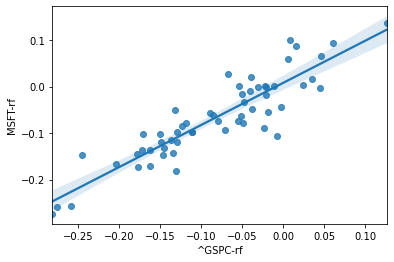

In [35]:
sns.regplot(x='^GSPC-rf',y='MSFT-rf', data=mtl_ret) # visualização grafica
plt.show()